In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot


# define linear congruence

def lc(N):  
    seed = 1.
    a=5
    c=0
    m=11
    random =np.zeros(N)
    random[0] = seed
    for i in range(1,N):
        random[i] = (a*random[i-1]+c)%m
    for i in range(N):
        random[i]=random[i]/m        
    
    return random

# define IBM's method

def IBM(N):      
    seed = 1.
    a=65539        # a & m from IBM's egenrator
    c=0
    m=2**31
    random=np.zeros(N)
    random[0] = seed
    for i in range(1,N):
        random[i] = (a*random[i-1]+c)%m
    for i in range(N):
        random[i]=random[i]/m           
    
    return random



Hit and miss method: 100 80 3.2 0.05840734641020706
Simple Monte Carlo: 100 3.4841397419484172 0.34254708835862413
Hit and miss method: 200 160 3.2 0.05840734641020706
Simple Monte Carlo: 200 3.484139741948417 0.3425470883586237
Hit and miss method: 400 320 3.2 0.05840734641020706
Simple Monte Carlo: 400 3.4841397419484132 0.34254708835862013
Hit and miss method: 800 640 3.2 0.05840734641020706
Simple Monte Carlo: 800 3.4841397419484 0.3425470883586068
Hit and miss method: 1600 1280 3.2 0.05840734641020706
Simple Monte Carlo: 1600 3.484139741948407 0.3425470883586139
Hit and miss method: 3200 2560 3.2 0.05840734641020706
Simple Monte Carlo: 3200 3.4841397419484315 0.34254708835863834
Hit and miss method: 6400 5120 3.2 0.05840734641020706
Simple Monte Carlo: 6400 3.484139741948444 0.3425470883586508
Hit and miss method: 12800 10240 3.2 0.05840734641020706
Simple Monte Carlo: 12800 3.48413974194845 0.342547088358657
Hit and miss method: 25600 20480 3.2 0.05840734641020706
Simple Monte Ca

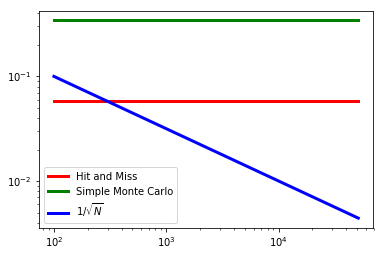

In [2]:
# Part 1 and 2


# Using Linear Congruence method

ngroups = 10

I_HM = np.zeros(ngroups)
I_SMC = np.zeros(ngroups)
N = np.zeros(ngroups)
E_HM = np.zeros(ngroups)
E_SMC = np.zeros(ngroups)

n0 = 100
for i in range(ngroups):

    N[i] = n0
    x = lc(n0)
    y = lc(n0)
    z = lc(n0)
    n = 0
    for j in range(n0):
      #  x = r[j]
        I_SMC[i] = I_SMC[i] + np.sqrt(1-z[j]**2)
        
        if(y[j] < np.sqrt(1-x[j]**2)):
            n = n+ 1
            
    I_HM[i] = 4.*float(n)/float(n0)
    I_SMC[i] *= 4./float(n0)
    E_HM[i] = abs(I_HM[i]-np.pi)
    E_SMC[i] = abs(I_SMC[i]-np.pi)
    print ("Hit and miss method:",n0,n,I_HM[i],E_HM[i])
    print("Simple Monte Carlo:",n0,I_SMC[i],E_SMC[i])
    n0 *= 2
    
pyplot.figure()            
pyplot.plot(N,E_HM,ls='-',c='red',lw=3,label='Hit and Miss');
pyplot.plot(N,E_SMC,ls='-',c='green',lw=3,label='Simple Monte Carlo');
pyplot.plot(N,1/np.sqrt(N),ls='-',c='blue',lw=3,label='$1/\sqrt{N}$');
pyplot.xscale('log')
pyplot.legend()
pyplot.yscale('log')

print('For hit and miss method correlations are very high. Values are far from pi. Error is a constant.\n')
print('For Simple Monte Carlo method the values are even further away from pi. Error is higher and it is constant.\n')
print("========\n")
# Part 3 and Part 4
n0 = 100000
I = np.zeros(n0)
r = lc(n0)
for j in range(n0):
    x = r[j]
    I[j] = 4*np.sqrt(1-x**2)

def group_measurements(ngroups):
    global I,n0
    
    nmeasurements = n0/ngroups
    for n in range(ngroups):
        Ig = 0.
        Ig2 = 0.
        for i in range(int(n*nmeasurements),int((n+1)*nmeasurements)):
            Ig += I[i]
            Ig2 += I[i]**2
        Ig /= nmeasurements
        Ig2 /= nmeasurements
        sigma = Ig2-Ig**2
        print('For number of groups=',ngroups,Ig,Ig2,sigma)
        
group_measurements(10)
print("=============================")
group_measurements(20)
print("=============================\n")
group_measurements(1)
print('Value of pi is very far from actual value. And error is even higher than before')

Hit and miss method: 100 61 2.44 0.7015926535897932
Simple Monte Carlo: 100 3.0015029537655575 0.14008969982423558
Hit and miss method: 200 133 2.66 0.481592653589793
Simple Monte Carlo: 200 3.101017994194918 0.040574659394875034
Hit and miss method: 400 271 2.71 0.43159265358979315
Simple Monte Carlo: 400 3.096052653708274 0.04553999988151913
Hit and miss method: 800 542 2.71 0.43159265358979315
Simple Monte Carlo: 800 3.101795642448037 0.039797011141756045
Hit and miss method: 1600 1133 2.8325 0.3090926535897931
Simple Monte Carlo: 1600 3.1485304643040974 0.006937810714304327
Hit and miss method: 3200 2280 2.85 0.291592653589793
Simple Monte Carlo: 3200 3.1486095186684255 0.007016865078632417
Hit and miss method: 6400 4573 2.858125 0.2834676535897933
Simple Monte Carlo: 6400 3.1501577993947723 0.008565145804979135
Hit and miss method: 12800 9039 2.8246875 0.3169051535897931
Simple Monte Carlo: 12800 3.137733307706979 0.0038593458828142246
Hit and miss method: 25600 18050 2.8203125 0.

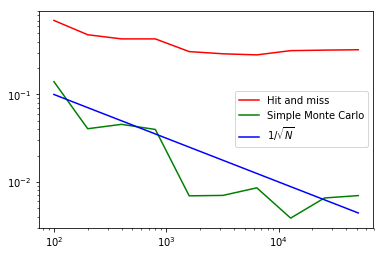

In [3]:
# Using IBM's random number generator method

# part 1 and 2
ngroups = 10

I_HM = np.zeros(ngroups)
I_SMC = np.zeros(ngroups)
N = np.zeros(ngroups)
E_HM = np.zeros(ngroups)
E_SMC = np.zeros(ngroups)

n0 = 100
for i in range(ngroups):

    N[i] = n0
    x = IBM(n0)
    y = IBM(n0)
    z = IBM(n0)
    n = 0
    for j in range(n0):
      #  x = r[j]
        I_SMC[i] = I_SMC[i] + np.sqrt(1-z[j]**2)
        
        if(y[j] < np.sqrt(1-x[j]**2)):
            n = n+ 1
            
    I_HM[i] = 4.*float(n)/float(n0)
    I_SMC[i] *= 4./float(n0)
    E_HM[i] = abs(I_HM[i]-np.pi)
    E_SMC[i] = abs(I_SMC[i]-np.pi)
    print ("Hit and miss method:",n0,n,I_HM[i],E_HM[i])
    print("Simple Monte Carlo:",n0,I_SMC[i],E_SMC[i])
    n0 *= 2
    
pyplot.figure()            
pyplot.plot(N,E_HM,'-r',label='Hit and miss')
pyplot.plot(N,E_SMC,'-g',label='Simple Monte Carlo')
pyplot.plot(N,1/np.sqrt(N),'-b',label='$1/\sqrt{N}$')
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.legend()

print('For hit and miss method correlations are very high. Values are far from pi. Error is a constant.\n')
print('For Simple Monte Carlo method the values are even further away from pi. Error is higher and it is constant.\n')
print("========\n")

# Part 3 and Part 4
n0 = 100000
I = np.zeros(n0)
r = IBM(n0)
for j in range(n0):
    x = r[j]
    I[j] = 4*np.sqrt(1-x**2)

def group_measurements(ngroups):
    global I,n0
    
    nmeasurements = n0/ngroups
    for n in range(ngroups):
        Ig = 0.
        Ig2 = 0.
        for i in range(int(n*nmeasurements),int((n+1)*nmeasurements)):
            Ig += I[i]
            Ig2 += I[i]**2
        Ig /= nmeasurements
        Ig2 /= nmeasurements
        sigma = Ig2-Ig**2
        print('For number of groups=',ngroups,Ig,Ig2,sigma)
        
group_measurements(10)
print("=============================")
group_measurements(20)
print("=============================\n")
group_measurements(1)
print('Value of pi is very far from actual value. And error is even higher than before')